# Estudo dos dados do PENSE

O estudo realizado nesse Notebook objetiva fazer uma análise dos dados do PENSE (Pesquisa Nacional de Saúde do Escolar), que investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.  

Nesta edição, que é de 2015, importantes inovações foram introduzidas na pesquisa, dentre as quais se destaca a disponibilização de informações oriundas de dois planos amostrais distintos: escolares frequentando o 9o ano do ensino fundamental e escolares de 13 a 17 anos de idade frequentando as etapas do 6o ao 9o ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio, que essa segunda amostra é a que será utilizada nesse estudo. A segunda amostra, por sua vez, proporciona melhor identificação e acompanhamento de fatores relacionados ao desenvolvimento físico-biológico e ao tempo de exposição às condições de risco para o grupo etário considerado, e viabiliza maior comparabilidade com indicadores internacionais, em especial aqueles provenientes da OMS.

## Objetivo da análise

## Metodologia

## Construção do DataFrame e Tratamento dos dados

O Site do IBGE disponibiliza os dados em Zip para fazer o download. O download foi feito e colocado no Drive para os arquivos serem usados diretamente do Drive.


### Importação dos dados e bibliotecas

In [ ]:
# importação de bibliotecas que serão usadas

from zipfile import ZipFile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(path)
caminho_pasta_zipada = zip.namelist()[1]

In [ ]:
dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands=".", decimal=",")

In [ ]:
dados.head(5)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [ ]:
dados.describe()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
count,16556.0,16556.0,16556.000000,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,...,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16511.000000,16509.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,2015.0,76.0,3.012443,1.0,1.499456,2.698417,14.095917,6.529778,6.497886,1.177821,1.456088,5.521442,4.472457,1.932774,-0.658976,1.630527,1.237739,1.367480,1.311790,1.514073,1.782556,2.646895,1.983027,3.811851,2.061669,2.059737,2.202404,4.418277,2.930539,5.677700,3.132762,4.819220,4.791737,4.47747,4.002054,2.233692,3.396654,2.449505,1.855762,1.530503,...,3.256040,2.685794,3.301643,2.672807,2.617420,4.024583,2.473967,1.851776,3.165257,2.645446,2.823750,5.126782,2.082085,0.57073,2.645023,2.712129,2.066018,2.461404,2.400821,2.295240,2.138802,2.408009,2.413989,2.469014,720.067167,1707.824944,54.705581,160.713113,1.940324,2.333474,3095.650459,3.012443,1144.868891,1.051401,1.252174,2.671781,-0.341024,8278.500000,186.053938,320.036241
std,0.0,0.0,1.414031,0.0,0.500015,3.868506,2.127947,4.210372,4.016313,2.542142,2.976776,4.843260,3.235230,2.846333,1.887961,3.423028,3.242986,3.422951,3.335345,3.589203,3.328680,2.834142,3.391287,2.973932,1.951140,5.510869,4.944444,3.140680,3.147671,5.076772,4.987270,5.019093,5.200573,5.14835,4.629152,4.148241,3.550049,3.240009,2.906492,3.686487,...,11.317482,9.399305,10.124933,6.210680,6.677625,6.102175,10.018074,7.598201,11.359404,8.084829,10.074287,12.213946,9.550399,6.16366,9.097973,9.245862,6.856720,6.812536,6.820812,6.833927,6.850322,6.819859,6.819060,6.811458,1237.323409,1078.777096,14.547864,10.340070,0.236893,0.685435,1443.400564,1.414031,1133.068244,0.220822,0.434274,0.872426,1.282048,4779.449864,107.358284,186.022453
min,2015.0,76.0,1.000000,1.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.800000,124.100000,1.000000,1.000000,311.000000,1.000000,24.213647,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
25%,2015.0,76.0,2.000000,1.0,1.000000,1.000000,12.000000,4.000000,5.000000,1.000000,1.00000

### Checagem e tratamento dos dados

In [ ]:
# Checar se existem dados NaN do DataFrame

dados.isna().sum().sum()

432

In [ ]:
# Checagem das colunas com NaN

colunas_nan = dados.loc[:, dados.isnull().any()].columns
colunas_nan

Index(['TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST',
       'VB17001', 'VB17002'],
      dtype='object')

In [ ]:
# Mostrar somente as linhas com dados NaN

df_nan = dados[dados.isnull().T.any()]
df_nan.sample(8)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
10306,2015,76,4,1,1,2,12,10,8,2,2,2,5,2,-1,2,2,2,2,2,1,2,2,1,3,2,2,2,4,1,2,5,1,3,4,6,1,1,-1,2,...,1,1,99,3,1,4,2,-1,99,1,99,-1,1,-1,1,1,2,1,2,2,2,2,2,2,342.0,1431.0,34.2,143.1,2,2,4123,4,878.272272,1,1,2,-1,10307,227,641
7689,2015,76,3,1,1,4,16,4,5,1,1,3,5,2,-1,2,1,2,2,1,1,2,2,4,1,2,2,6,4,8,3,7,4,4,1,1,5,1,-1,3,...,2,2,1,1,1,4,1,1,3,1,2,-1,1,-1,1,2,1,2,2,2,2,2,2,2,998.0,998.0,78.1,175.4,1,3,3123,3,3543.939229,1,1,2,-1,7690,171,543
6659,2015,76,3,1,2,5,11,6,9,1,1,8,4,2,-1,1,1,1,1,1,1,3,2,2,1,1,2,6,5,4,6,8,8,5,4,5,1,1,4,1,...,2,1,2,1,2,4,2,-1,1,2,3,13,1,1,1,2,2,2,2,2,1,2,2,2,NaN,NaN,53.4,151.1,1,3,3121,3,1291.187793,1,1,3,-1,6660,150,26
11112,2015,76,4,1,1,5,12,7,9,1,1,8,4,2,-1,1,2,1,1,1,1,3,2,1,5,1,2,5,5,7,2,4,5,7,5,1,5,1,4,1,...,2,2,2,3,3,4,1,1,1,2,3,3,2,-1,1,2,2,2,1,2,2,2,2,2,375.0,1410.0,37.5,141.0,2,2,4123,4,844.958496,1,1,2,-1,11113,245,619
4713,2015,76,2,1,2,4,18,2,3,2,2,8,6,2,-1,1,1,1,1,1,1,2,2,6,4,2,2,5,3,8,1,1,8,2,2,1,5,1,1,1,...,2,2,2,4,3,3,1,7,1,2,2,8,1,2,2,2,1,2,2,2,2,2,2,2,397.0,1492.0,39.7,149.2,2,2,2123,2,2088.815917,1,1,2,-1,4714,110,468
8010,2015,76,3,1,1,4,15,5,6,1,1,2,5,2,-1,2,1,1,1,2,1,3,2,4,1,1,2,3,2,5,2,1,8,6,8,1,1,1,4,1,...,2,1,1,1,1,4,1,1,3,1,2,-1,1,-1,1,1,1,1,2,2,2,2,2,2,602.0,1754.0,60.2,175.4,2,2,3121,3,2987.297088,1,1,3,-1,8011,177,391
10270,2015,76,4,1,2,4,13,2,8,2,1,8,3,2,-1,2,1,1,1,1,1,2,2,2,3,1,2,6,5,8,99,1,8,1,8,1,1,1,4,1,...,2,2,4,1,1,4,99,-1,99,1,1,-1,99,1,1,99,1,2,2,2,2,2,2,2,409.0,1600.0,40.9,160.0,2,2,4123,4,1298.754888,1,1,2,-1,10271,226,601
3164,2015,76,1,1,2,4,19,8,10,2,2,3,5,1,1,2,1,1,1,99,2,3,2,7,4,99,2,2,5,3,3,4,2,3,2,6,6,6,-1,2,...,1,1,5,5,4,1,2,-1,2,1,2,99,1,1,2,2,2,1,2,2,2,2,2,2,607.0,1530.0,60.7,153.0,2,3,1112,1,300.153022,1,1,2,-1,3165,73,527


In [ ]:
# Mostrar onde temos dados NaN

df_nan[colunas_nan].isna().sum()

TEMPODESLOC     33
TEMPOTOTAL      20
TEMPOEDFIS      84
TEMPOEXTRA      93
TEMPOEST       110
VB17001         45
VB17002         47
dtype: int64

In [ ]:
df_nan[colunas_nan].sample(8)

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002
12981,0.0,390.0,165.0,225.0,NaN,595.0,1549.0
690,70.0,100.0,30.0,NaN,300.0,366.0,1489.0
4282,110.0,250.0,NaN,140.0,60.0,582.0,1654.0
15481,280.0,475.0,195.0,0.0,NaN,423.0,1516.0
7398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8062,65.0,585.0,65.0,455.0,420.0,NaN,NaN
7857,210.0,210.0,0.0,NaN,300.0,525.0,1740.0


Ao ver as colunas com dados NaN, cheguei ao problema de compreender o que as perguntas significam, uma vez que em alguns casos são conjuntos de letras e números para especificar a pergunta.

#### Facilitando a compreensão das perguntas

In [ ]:
excel = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/Dicionario_PENSE_Microdados_AMOSTRA2.xls'

dados_excel = pd.read_excel(excel)

In [ ]:
# Montar o dicionario de codigo da coluna e qual é a pergunta referente ao código

dados_excel.set_index('VARIÁVEL', inplace = True)
dicionario_perguntas = {}
colunas_perguntas = list(dados.columns)

for i in colunas_perguntas:
  dicionario_perguntas[i] = dados_excel.loc[i][0]


# Definição de uma função para mostrar qual a pergunta referente ao código da coluna

def qual_a_pergunta(codigo : str):
  return print("A pergunta do código {} é: '{}'.".format(codigo,dicionario_perguntas[codigo]))

In [ ]:

# Montar o dicionário das respostas das perguntas!
dados_excel.reset_index(inplace=True)
dicionario_respostas = {}
lista_indexes = []

# A função abaixo monta uma lista com o index das linhas do arquivo excel, em que temos perguntas

for variavel in dados_excel["VARIÁVEL"]:
  if variavel in colunas_perguntas:
    lista_indexes.append(dados_excel.query(f"VARIÁVEL == '{variavel}'").index[0])


''' 
Essa parte do código faz um looping dentro do range da quantidade de dados
da lista montada anteriormente. Cada vez que ela itera ela usa o valor daquele número inteiro
dentro daquela lista de indexes, assim se o primeiro index for o 5, ele na primeira interação
busca o index 5 com a função loc, porém como só quero as respostas, adicionamos +1 ao index
para buscar somente as respostas. Para delimitar ele busca no próximo item da lista de indexes
qual é o index e dessa vez substrai 1 do valor para selecionar somente os items dessa uma
única resposta. Assim atribui esse dataframe à uma variavel à um dicionário que foi 
adicionado no dicionário definido nessa célula como dicionario_respostas
'''

for i in range(len(lista_indexes)+1):
  if i == 180:
    dict_temp = dados_excel.loc[lista_indexes[i]+1:].set_index("VARIÁVEL")
    dict_temp = dict_temp.rename(columns ={'QUESTIONÁRIO DO ALUNO':dados_excel.loc[lista_indexes[i]][0]}).to_dict()  
  else:
    try:
      dict_temp = dados_excel.loc[lista_indexes[i]+1:lista_indexes[i+1]-1].set_index("VARIÁVEL")
      dict_temp = dict_temp.rename(columns ={'QUESTIONÁRIO DO ALUNO':dados_excel.loc[lista_indexes[i]][0]}).to_dict()
    except Exception:
      pass

  dicionario_respostas.update(dict_temp)

# Definição da função para retornar como são as respostas daquele código

def como_respostas(codigo:str):
  if dicionario_respostas[codigo] == {}:
    print("Resposta impossível de classificar") 
  else:
    return  dicionario_respostas[codigo]

In [ ]:
# A ideia dessa função é mostrar o que aquela código de coluna significa,
#mostrando a pergunta, e as possíveis respostas.

def descricao_pergunta(coluna : str):
  qual_a_pergunta(codigo = coluna)
  if dicionario_respostas[coluna] == {}:
    print("As respostas não foram possíveis de classificar, verifique diretamente no DataFrame")
  else:
    print("Respostas:")
    return dicionario_respostas[coluna]

In [ ]:
descricao_pergunta("VB01004")

A pergunta do código VB01004 é: 'Qual é o mês do seu aniversário?'.
Respostas:


{1: 'Janeiro',
 2: 'Fevereiro',
 3: 'Março',
 4: 'Abril',
 5: 'Maio',
 6: 'Junho',
 7: 'Julho',
 8: 'Agosto',
 9: 'Setembro',
 10: 'Outubro',
 11: 'Novembro',
 12: 'Dezembro',
 99: 'Não informado'}

In [ ]:
qual_a_pergunta(dados.columns[57])

A pergunta do código VB03011A é: 'NOS ÚLTIMOS 7 DIAS, em quantos dias você fez atividade física por pelo menos 60 minutos (1 hora) por dia? (Some todo o tempo que você gastou em qualquer tipo de atividade física EM CADA DIA)'.


### Checagem e tratamento dos dados pt.2

In [ ]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
descricao_pergunta('VB17003')

A pergunta do código VB17003 é: 'Peso do estudante, incluindo os imputados, com uma casa decimal '.
As respostas não foram possíveis de classificar, verifique diretamente no DataFrame


In [ ]:
descricao_pergunta('VB17004')

A pergunta do código VB17004 é: 'Altura do estudante, incluindo os imputados, com uma casa decimal'.
As respostas não foram possíveis de classificar, verifique diretamente no DataFrame


Existe mais de uma forma da apresentação do peso e altura nesse dataframe, utilizarei a VB17003 e VB17004 que são as que mais se aproximam da forma correta para calcular o IMC.

In [ ]:
dados["IMC"] = (dados["VB17003"]/(dados["VB17004"]/100)**2).round(2)

In [ ]:
dados['IMC']

0        15.05
1        21.73
2        18.50
3        23.32
4        28.12
         ...  
16551    20.11
16552    17.93
16553    23.97
16554    19.00
16555    23.30
Name: IMC, Length: 16556, dtype: float64

In [ ]:
# Além do indice número, também utilizarei as nomeclaturas

classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo","normal", "sobrepeso", "obesidade"]

dados["classe_IMC"] = pd.cut(x = dados["IMC"], 
                             bins = classes,
                             labels = labels,
                             include_lowest = True)

In [ ]:
dados[["IMC","classe_IMC"]]

,IMC,classe_IMC
0,15.05,abaixo
1,21.73,normal
2,18.50,abaixo
3,23.32,normal
4,28.12,sobrepeso
...,...,...
16551,20.11,normal
16552,17.93,abaixo
16553,23.97,normal
16554,19.00,normal


## Análise Exploratória

In [ ]:
dados.describe()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,IMC
count,16556.0,16556.0,16556.000000,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,...,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16511.000000,16509.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,2015.0,76.0,3.012443,1.0,1.499456,2.698417,14.095917,6.529778,6.497886,1.177821,1.456088,5.521442,4.472457,1.932774,-0.658976,1.630527,1.237739,1.367480,1.311790,1.514073,1.782556,2.646895,1.983027,3.811851,2.061669,2.059737,2.202404,4.418277,2.930539,5.677700,3.132762,4.819220,4.791737,4.47747,4.002054,2.233692,3.396654,2.449505,1.855762,1.530503,...,2.685794,3.301643,2.672807,2.617420,4.024583,2.473967,1.851776,3.165257,2.645446,2.823750,5.126782,2.082085,0.57073,2.645023,2.712129,2.066018,2.461404,2.400821,2.295240,2.138802,2.408009,2.413989,2.469014,720.067167,1707.824944,54.705581,160.713113,1.940324,2.333474,3095.650459,3.012443,1144.868891,1.051401,1.252174,2.671781,-0.341024,8278.500000,186.053938,320.036241,20.958237
std,0.0,0.0,1.414031,0.0,0.500015,3.868506,2.127947,4.210372,4.016313,2.542142,2.976776,4.843260,3.235230,2.846333,1.887961,3.423028,3.242986,3.422951,3.335345,3.589203,3.328680,2.834142,3.391287,2.973932,1.951140,5.510869,4.944444,3.140680,3.147671,5.076772,4.987270,5.019093,5.200573,5.14835,4.629152,4.148241,3.550049,3.240009,2.906492,3.686487,...,9.399305,10.124933,6.210680,6.677625,6.102175,10.018074,7.598201,11.359404,8.084829,10.074287,12.213946,9.550399,6.16366,9.097973,9.245862,6.856720,6.812536,6.820812,6.833927,6.850322,6.819859,6.819060,6.811458,1237.323409,1078.777096,14.547864,10.340070,0.236893,0.685435,1443.400564,1.414031,1133.068244,0.220822,0.434274,0.872426,1.282048,4779.449864,107.358284,186.022453,4.244454
min,2015.0,76.0,1.000000,1.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.800000,124.100000,1.000000,1.000000,311.000000,1.000000,24.213647,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.400000
25%,2015.0,76.0,2.000000,1.0,1.000000,1.000000,12.000000,4.000000,5.000000,1.000000,1.000000,3.

In [ ]:
# Distribuição de participantes por sexo
def dist_valor(coluna:str):
  dist = pd.DataFrame(dados[coluna].value_counts(normalize = True)*100)
  dist.index = dist.index.astype("string")
  dist.rename(index= dicionario_respostas[coluna], columns = dicionario_perguntas, inplace=True)
  dist.rename(index = {'99' :"Não Informado"}, inplace = True)
  return dist


In [ ]:
# Cruzamento de dados

def cruzar_dados(indice, colunas, normalizado = None):
  if normalizado == None:
    cruzado = pd.DataFrame(pd.crosstab(dados[indice], dados[colunas]))
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)
    cruzado.index = cruzado.index.astype("string")
    cruzado.columns = cruzado.columns.astype("string")
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)

  elif normalizado == "columns" or normalizado == "index":
    cruzado = pd.DataFrame(pd.crosstab(dados[indice], dados[colunas], normalize= normalizado))*100
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)
    cruzado.index = cruzado.index.astype("string")
    cruzado.columns = cruzado.columns.astype("string")
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)

  else:
    cruzado = print("Erro")
  
  return cruzado

In [ ]:
dist_valor("VB01001")

,Qual é o seu sexo?
Masculino,50.054361
Feminino,49.945639


In [ ]:
dist_valor("VB01002")

,Qual é a sua cor ou raça?
Parda,40.625755
Branca,39.713699
Preta,11.711766
Amarela,4.300556
Indígena,3.509302
Não Informado,0.138922


In [ ]:
cruzar_dados("VB01002","VB01001", "columns")

VB01001,Masculino,Feminino
VB01002,,
Branca,41.341861,38.081993
Preta,13.334138,10.085863
Amarela,3.644262,4.958278
Parda,37.830337,43.427258
Indígena,3.704598,3.313581
Não informado,0.144805,0.133027


In [ ]:
sns.set_theme(style = 'darkgrid')

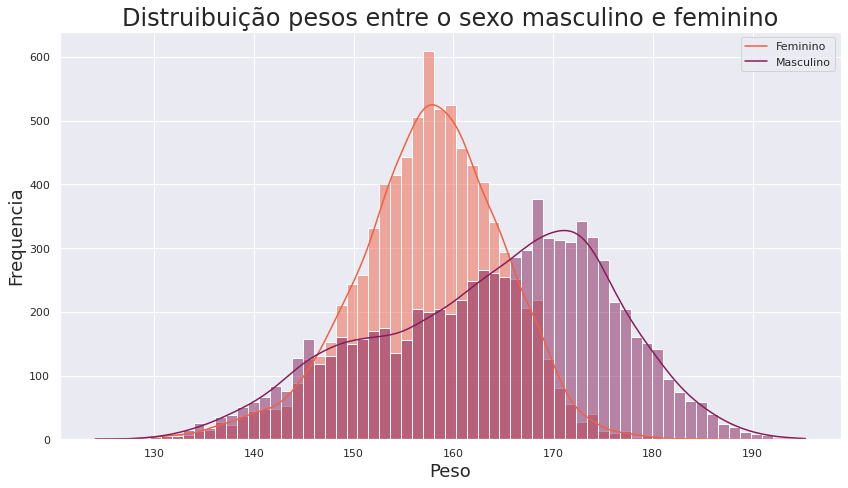

In [ ]:
# Distribuição dos Pesos

plt.figure(figsize = (14,7.5))
ax = sns.histplot(data = dados, x = "VB17004", hue = "VB01001", kde = True,
                  palette=sns.color_palette('rocket',2))
plt.legend(["Feminino","Masculino"])
ax.set_title("Distruibuição pesos entre o sexo masculino e feminino", fontsize = 24)
ax.set_ylabel("Frequencia", fontsize = 18)
ax.set_xlabel("Peso", fontsize = 18)
plt.show()

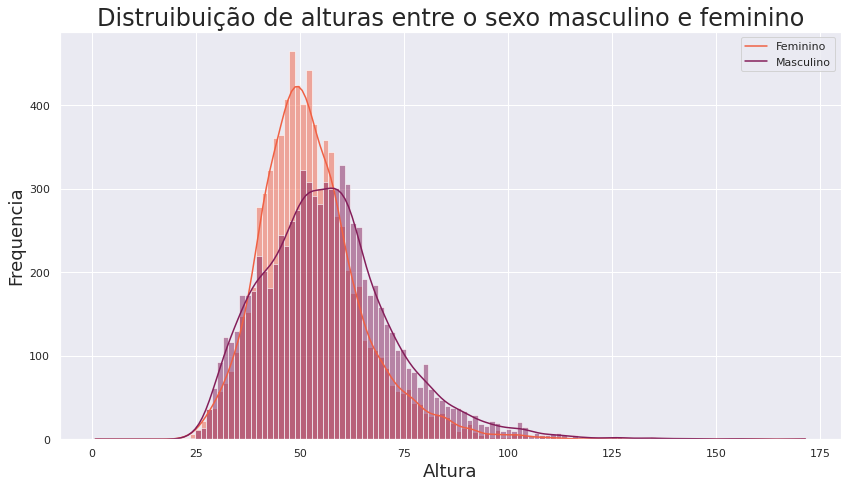

In [ ]:
plt.figure(figsize = (14,7.5))
ax = sns.histplot(data = dados, x = "VB17003", hue = "VB01001", kde = True,
                  palette=sns.color_palette('rocket',2))
plt.legend(["Feminino","Masculino"])
ax.set_title("Distruibuição de alturas entre o sexo masculino e feminino", fontsize = 24)
ax.set_ylabel("Frequencia", fontsize = 18)
ax.set_xlabel("Altura", fontsize = 18)
plt.show()

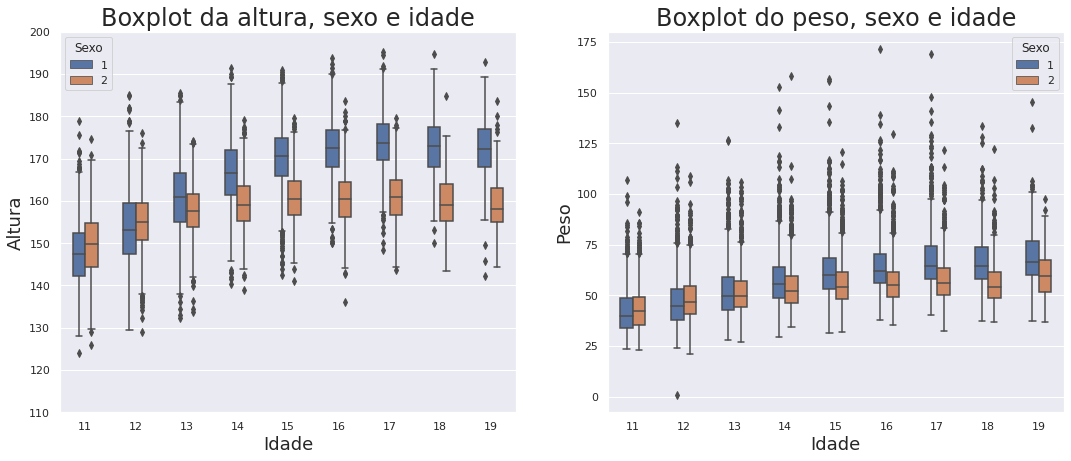

In [ ]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
ax = sns.boxplot(data = dados, y = "VB17004",x = "VB01003", hue="VB01001", width = 0.5)
ax.set_title("Boxplot da altura, sexo e idade",fontsize = 24)
ax.set_ylabel("Altura", fontsize = 18)
ax.set_xlabel("Idade", fontsize = 18)
ax.set_ylim(110,200)
plt.legend(title = "Sexo")

plt.subplot(1,2,2)
ax1 = sns.boxplot(data = dados, y = "VB17003",x = "VB01003", hue="VB01001", width = 0.5)
ax1.set_title("Boxplot do peso, sexo e idade", fontsize = 24)
ax1.set_ylabel("Peso", fontsize = 18)
ax1.set_xlabel("Idade", fontsize = 18)
plt.legend(title = "Sexo")

plt.show()

Nos dois plots de cima vemos que a altura e peso entre alunos do sexo masculino são diferentes em suas curvas, tanto na sua crescente quanto na distribuição total. Quando analisamos de todos os dados. Vemos que o peso, altura dos jovens do sexo masculino tendem a ser curvas com valores maiores.

Os dados levando em consideração a idade seguem a mesma tendência, onde o sexo masculino tem valores mais altos em sua maioria, porém tanto no peso quanto na altura, os valores do sexo femino são maiores, porém após isso os dois apresentam crescimento continuo porém o do sexo masculino é mais acentuado.

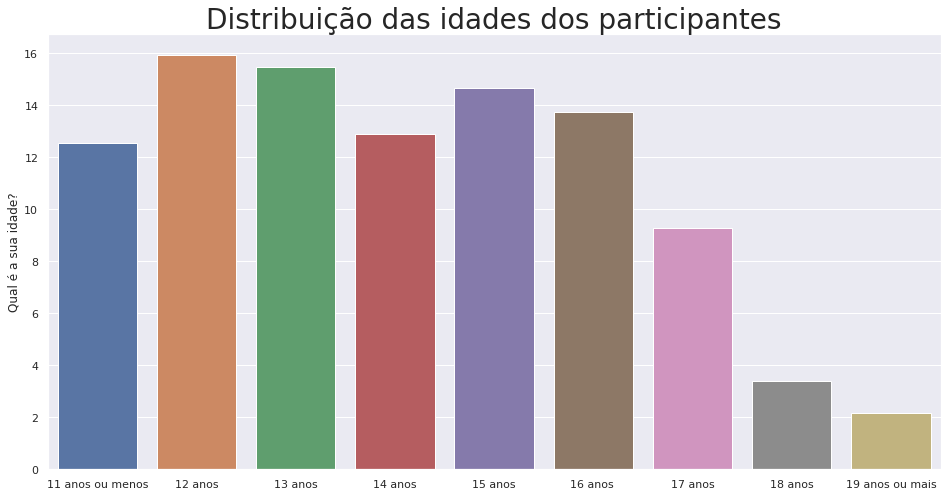

In [ ]:
# Distribuição simples da idade dos participantes

df_temp = dist_valor("VB01003").round(2).sort_index()

ax = sns.barplot(x=df_temp.index, y = df_temp[df_temp.columns[0]])
ax.set_title("Distribuição das idades dos participantes", fontsize = 28)
ax.figure.set_size_inches(16,8)